# Prøve-eksamen i Fys1120 H2022 - eksempeloppgave 2

Dette oppgavesettet tilsvarer en av to oppgaver som dere vil få til eksamen. (Denne oppgaven er stor, så den andre oppgaven vil være mindre). Hver oppgave på eksamen vil bestå av en Jupyter-notebook som dette. Dere arbeider med oppgaven i notebook'en og leverer notebook'en som en pdf file ved å lagre notebook'en og så laste den opp i inspera.

Dere vil kunne får både teori-oppgaver, programmerings-oppgaver og diskusjons-oppgaver som del av eksamen. Alle svarene skal dere skrive i den samme notebook'en.

## Magnetisk felt rundt en magnetisk dipol

Vi skal i denne oppgaven studere det magnetiske feltet rundt en magnetisk dipol i form av en sirkulær krets med en strøm $I$ og radius $a$ som ligger i $xy$-planet med sentrum i origo.

### Oppgave (a)
Vis at det magnetiske feltet $\vec{B}(x,0,0)$ rundt en uendelig lang ledning langs $y$-aksen med en strøm $I$ er gitt som
$$\vec{B}(x,0,0) = \frac{\mu_0 I}{2 \pi x}\left( -\hat{z}\right)$$

$$
\vec{B}(x) = \frac{μ_0}{4π} \frac{Id \bf l × \mathbf R}{R^3}, \quad d \mathbf l = d \hat{y}, \quad \mathbf R = (x,0,0) - (0,y',0) = (x,-y,0), \quad R = \sqrt{x^2 + y'^2}
$$
Vi kan ignorere y aksen i kryssproduket og krysser derfor bare x og y som gir -$\hat{z}$
$$

$$

### Eksempel
Som hjelp til å løse oppgaven nedenfor kan du ta utgangspunkt i dette eksempelet.

Bidraget til det magnetiske feltet fra en strøm $I$ gjennom et linjestykke langs $y$-aksen fra $y=-a/2$ til $y = a/2$ kan finnes og visualiseres i $xz$-planet ved hjelp av følgende program.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Bfield(r, )

def BfieldLineY(r, I, line_lenght, L, N):
    '''
    Uses line parallel to y-axis to calculate magnetic field in xy-plane
    '''
    x,y = [np.linspace(-L,L,N) for i in range(2)]
    rx, ry = np.meshgrid(x,y)
    Bx, By = np.zeros((2,N,N))
    
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i], ry.flat[i], 0])
        
    

In [11]:
a = 0.1 # Lengde av ledning (m)
l0 = np.array([0,-a/2,0])
l1 = np.array([0,a/2,0])
I = 1.0 # Strøm (A)
Nl = 100 # Antall elementer i linjestykke
#
x,z,rx,rz,Bx,Bz = findBfield_line(-1.0*a,1.0*a,-1.0*a,1.0*a,30,30,I,l0,l1,Nl)

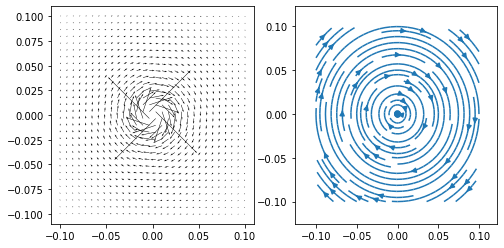

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.quiver(rx,rz,Bx,Bz)
plt.subplot(1,2,2)
plt.streamplot(rx,rz,Bx,Bz)

### Oppgave (b)
Skriv et program som finner det magnetiske feltet fra en sirkelformet krets med en strøm $I$ som har en radius $a$ og ligger i $xy$-planet med sentrum i origo. Visualiser det magnetiske feltet i $xz$-planet både i et området rundt origo og i et område rundt $(a,0,0)$. Velg et utsnitt som du anser som passende.

In [58]:
from numba import njit
@njit
def BfieldCircle(r, I, radius, n = 100):
    B = np.zeros(3)
    μ_0 = 1.257e-6
    μ04pi = μ_0/(4*np.pi)
    dl = 2*np.pi*radius/n
    dθ = 2*np.pi/n
    for i in range(n):
        Idl = I*dl*np.array([-np.sin(dθ*i), np.cos(dθ*i), 0.0])
        r_i = radius*np.array([np.cos(dθ*i), np.sin(dθ*i), 0.0])
        R = r - r_i
        R_norm = np.linalg.norm(R)
        B += μ04pi* np.cross(Idl, R)/R_norm**3
    
    return B

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
N = 50
L = 2
a = 1
I = 10
x,z = [np.linspace(-L, L, N) for i in range(2)]
rx, rz = np.meshgrid(x, z)
Bx, Bz = np.zeros((2,N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], 0, rz.flat[i]])
    Bx.flat[i], By, Bz.flat[i] = BfieldCircle(r, I, a)

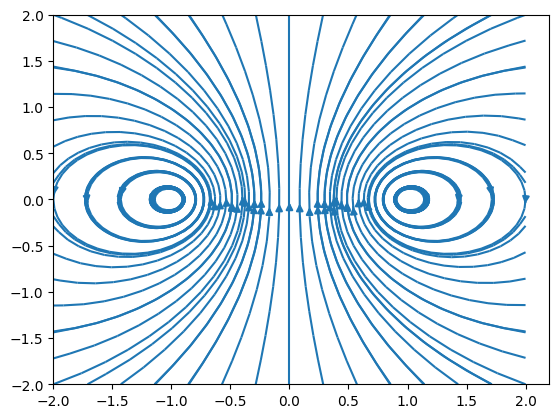

In [75]:
plt.streamplot(rx, rz, Bx, Bz, broken_streamlines = False, density = .5)

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
N = 20
L = 1
a = 1
I = 10
x = np.linspace(-L + a, L + a, N)
z = np.linspace(-L, L, N)
rx, rz = np.meshgrid(x, z)
Bx, Bz = np.zeros((2,N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], 0, rz.flat[i]])
    Bx.flat[i], By, Bz.flat[i] = BfieldCircle(r, I, a)

(-0.1042597671280789, 2.100745432270302, -1.0, 1.0)

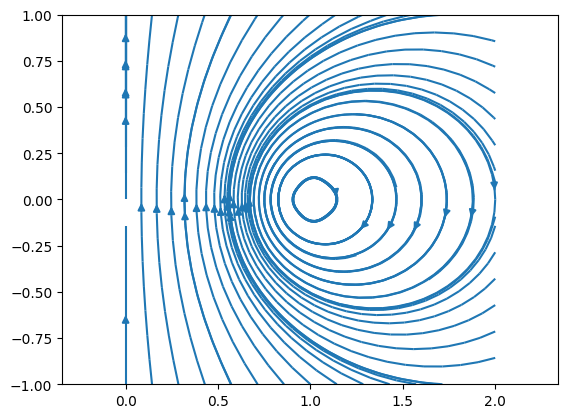

In [145]:
plt.streamplot(rx, rz, Bx, Bz, broken_streamlines = False, density = .5)
plt.axis('equal')

### Oppgave (c)
Sammenlikn det magnetiske feltet fra den sirkulære kretsen med resultatet for den uendelig lange lederen i oppgave (a) langs $x$-aksen. Velg selv passende områder for sammenlikningen slik at forskjellige elementer i den fysiske oppførselen til systemet kommer fram. Kommenter resultatene.

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
N = 40
L = a/2
a = 1
I = 1
x,z = [np.linspace(0, 2*a, N) for i in range(2)]
rx, rz = np.meshgrid(x, z)
Bx, Bz = np.zeros((2,N,N))

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], 0, rz.flat[i]])
    Bx.flat[i], By, Bz.flat[i] = BfieldCircle(r, I, a, 100)

In [147]:
def B(x, I):
    μ_0 = 1.257e-6
    μ02pi = μ_0/(2*np.pi)
    return -I*μ02pi/(x-a)

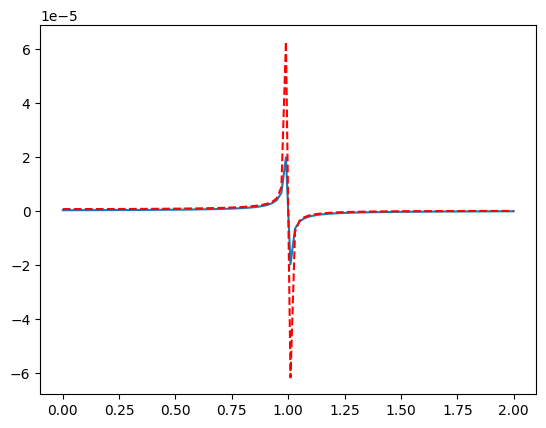

In [148]:
z_Anal = np.linspace(0, 2*a, 100)
B_Anal = B(z_Anal,I)

Bz = np.zeros(100)
for i in range(100):
    r = np.array([z_Anal[i], 0, 0])
    var1, var2, Bz[i] = BfieldCircle(r, I, a)

plt.plot(z_Anal,B_Anal)
plt.plot(z_Anal, Bz, color = 'red', linestyle = '--')
# plt.ylim(-0.0005, 0.0005)
# plt.xlim(-.25, .25)